### Assignment Problem

**Author:** Guilherme Cadori

**Date:** 10/04/2024



#### Mathematical Model

##### Sets
* $I$: Set of resources, indexed by *i*.
* $J$: Set of tasks, indexed by *j*.

##### Parameters
* $COST_{ij}$ : Cost of assigning resource *i* to task *j*.

##### Decision Variables
* $x_{ij}$ : A binary variable that is 1 if resource *i* is assigned to task *j* and equal to 0 otherwise.


##### Model
$\displaystyle 
min \sum_{i \in I} \sum_{j \in J} \textit{COST}_{ij} \cdot x_{ij}
$

$\displaystyle 
s.t. 
$

$\displaystyle
\sum_{j \in J} x_{ij} = 1 \quad \forall i \in I
$

$\displaystyle
\sum_{i \in I} x_{ij} = 1 \quad \forall j \in J
$

$x_{ij} \geq 0$

$x_{ij} \in \{0, 1\}$



#### Implementation

In [1]:
# Importing libraries
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Setting seed for reproducibility
np.random.seed(123)

# Sets
# Creating sets
resources = 5
tasks = 5

I = range(resources)
J = range(tasks)

# Parameters
# Creating transportation cost parameters
lower = 10
upper = 80
cost_task = np.random.uniform(lower, upper, (resources, tasks))


In [3]:
# Checking costs
cost_task


array([[58.75284299, 30.02975345, 25.87960175, 48.59203384, 60.36282788],
       [39.61745221, 78.65349389, 57.9380817 , 43.6652331 , 37.44822627],
       [34.02246113, 61.03347952, 40.70005713, 14.17745276, 37.86309787],
       [61.6596784 , 22.77442113, 22.28162293, 47.20859617, 47.2279311 ],
       [54.4080671 , 69.46022559, 60.71187274, 52.77164575, 60.57103678]])

In [4]:
# Creating model
model = gp.Model('Transport')

# Variables
# Creating variables
x = model.addVars(I, J, vtype=GRB.BINARY, name='x')

# Objective Function
Objective = gp.quicksum(cost_task[i, j] * x[i, j] for i in I for j in J)
model.setObjective(Objective, sense=GRB.MINIMIZE)

# Constraints
# Resource to task constraint
c1 = model.addConstrs((gp.quicksum(x[i, j] for j in J) == 1 for i in I), 
                       name='Resource Assignment')

# Task to resource constraint
c2 = model.addConstrs((gp.quicksum(x[i, j] for i in I) == 1 for j in J), 
                       name='Task Assignment')


Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-27


In [5]:
# Updating model - will be necessary in case we update constraints or parameters
model.update()


In [6]:
# Solving the model
model.optimize()


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10 rows, 25 columns and 50 nonzeros
Model fingerprint: 0x65390a33
Variable types: 0 continuous, 25 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 8e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 232.0230225
Presolve time: 0.00s
Presolved: 10 rows, 25 columns, 50 nonzeros
Variable types: 0 continuous, 25 integer (25 binary)

Root relaxation: objective 1.546878e+02, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     154.6877690  154.68777  0.00

#### Solution

In [7]:
# Checking solution
# Objective Function
print(f'Objective Funtion: {round(model.ObjVal, 2)}\n')

# Decision variables
print('Decision Variables:')
for var in model.getVars():
    if var.X > 0.5:
        print(f'Variable {var.VarName}: {var.X}')

# Slack check - Shoulve have none if optimal
print('\nSlack Values:')
# Initialize a flag to track if any slack is found
slack_found = False

# Iterate through all constraints to check their slack values
for constr in model.getConstrs():
    slack = constr.getAttr('Slack')
    if slack > 0.5:  
        print(f'Constraint {constr.ConstrName} Slack: {slack}')
        slack_found = True

# If no slack is found
if not slack_found:
    print('There are no slacks.')


Objective Funtion: 154.69

Decision Variables:
Variable x[0,2]: 1.0
Variable x[1,4]: 1.0
Variable x[2,3]: 1.0
Variable x[3,1]: 1.0
Variable x[4,0]: 1.0

Slack Values:
There are no slacks.


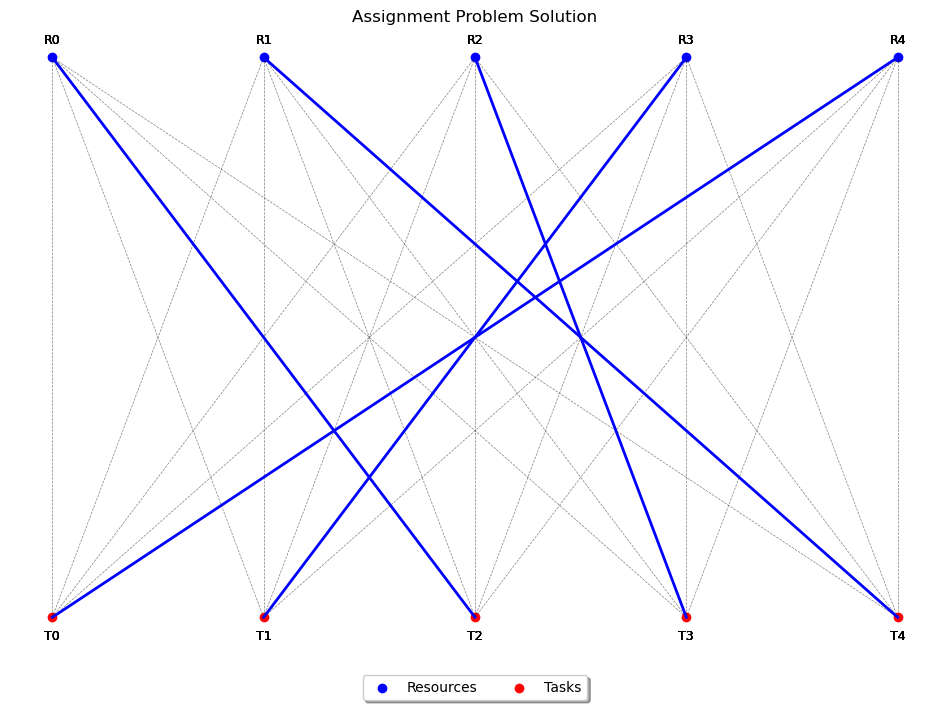

In [8]:
# Provided solution (adjusted to reflect binary assignments)
solution_x = {
    (0, 2): 1.0,
    (1, 4): 1.0,
    (2, 3): 1.0,
    (3, 1): 1.0,
    (4, 0): 1.0,
}

# Plotting the solution
fig, ax = plt.subplots(figsize=(12, 8))

# Resource nodes
resource_x = np.linspace(0.1, 0.9, resources)
resource_y = np.full(resources, 0.8)
ax.scatter(resource_x, resource_y, color='blue', label='Resources')

# Task nodes
task_x = np.linspace(0.1, 0.9, tasks)
task_y = np.full(tasks, 0.2)
ax.scatter(task_x, task_y, color='red', label='Tasks')

# Drawing edges for task costs
for i in I:
    for j in J:
        ax.plot([resource_x[i], task_x[j]], [resource_y[i], task_y[j]], 'k--', lw=0.5, alpha=0.5)
        mid_x = (resource_x[i] + task_x[j]) / 2
        mid_y = (resource_y[i] + task_y[j]) / 2
        ax.text(resource_x[i], resource_y[i] + 0.0125, f'R{i}', ha='center', va='bottom', fontsize=9)
        ax.text(task_x[j], task_y[j] - 0.0125, f'T{j}', ha='center', va='top', fontsize=9)


# Highlighting activated assignments based on the solution
for (i, j), val in solution_x.items():
    if val > 0:
        ax.plot([resource_x[i], task_x[j]], [resource_y[i], task_y[j]], 'b-', lw=2)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)
ax.axis('off')
ax.set_title('Assignment Problem Solution')

plt.show()


***
**End**
***